In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#In order to understand the data, i use inspect function
inspector = inspect(engine)

In [6]:
#by this command it allows us to give us the table names in the data
inspector.get_table_names()

['measurement', 'station']

In [7]:
# displaying the columns names and the data typech table 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement  
Station = Base.classes.station  

In [11]:
# Create our session (link) from Python to the DB
Session = Session(bind=engine)
session = Session

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
                          

most_recent_date


('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year before the most recent date
# Here we subtract 365 days for simplicity; adjust if you need to account for leap years
one_year_before = dt.date(2017,8,23)  - dt.timedelta(days=365)


one_year_before

datetime.date(2016, 8, 23)

In [17]:
# Perform a query to retrieve the date and precipitation scores

date_prcp_scores = session .query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_before).all()
date_prcp_scores

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [18]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_scores_df = pd.DataFrame(date_prcp_scores, columns=['date', 'participation'])

date_prcp_scores_df

,date,participation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [19]:

# Sort the dataframe by date
date_prcp_scores_df_bydate= date_prcp_scores_df.sort_values(by = 'date')

date_prcp_scores_df_bydate

,date,participation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


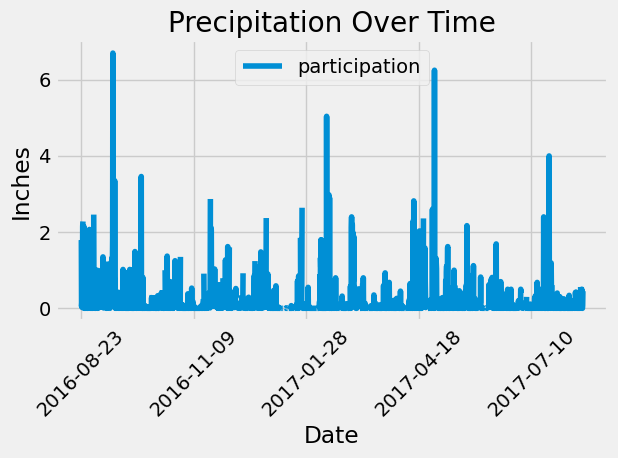

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

date_prcp_scores_df_bydate.plot(x='date', y='participation')

plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjusts plot parameters to give some padding

plt.show()

In [21]:
# Use Pandas to calculate the summary statistics for the precipitation data
date_prcp_scores_df_bydate.describe()

,participation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).distinct().scalar()
total_stations

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
list_active_stations = session.query(Measurement.station,
    func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

list_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
## Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first().station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
    ).filter(Measurement.station == most_active_station).all()
min_temp, max_temp, avg_temp = temperature_stats[0]
(min_temp, max_temp, avg_temp)



(54.0, 85.0, 71.66378066378067)

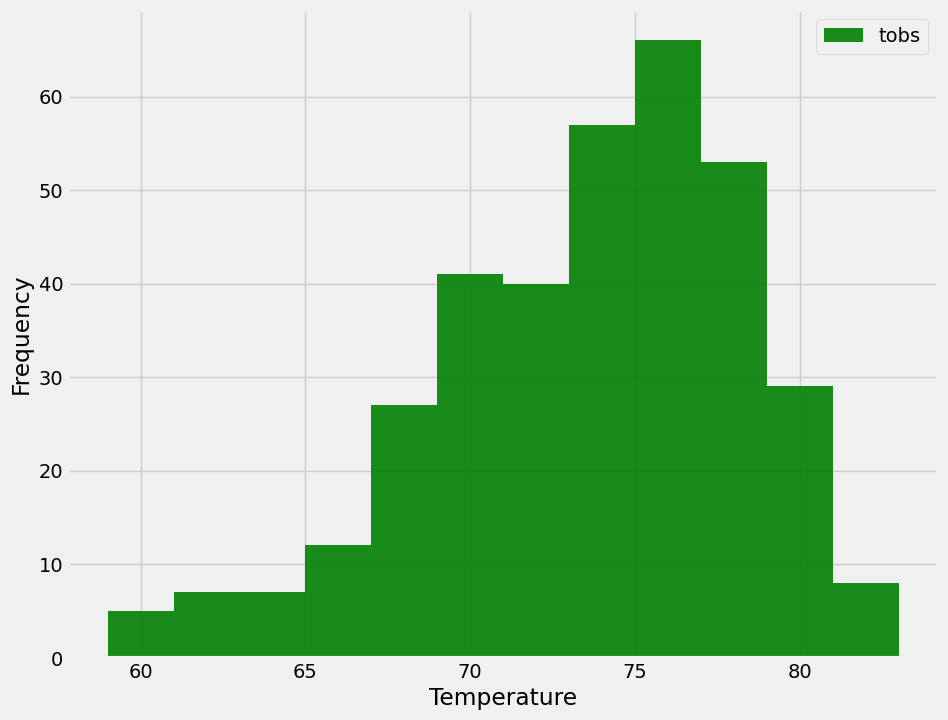

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_results = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_before.strftime("%Y-%m-%d")).\
    order_by(Measurement.date).all()
# Convert query results to a DataFrame
temperature_results_df = pd.DataFrame(temperature_results, columns=['Temperature'])
# Plot the results as a histogram
plt.figure(figsize=(10, 8))
plt.hist(temperature_results_df['Temperature'], bins=12, color='green', alpha = 0.9)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(['tobs'])

plt.show()


# Close Session

In [26]:
# Close Session
session.close()